In [1]:
#http://alexanderfabisch.github.io/t-sne-in-scikit-learn.html
#https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html #PCA
#https://stackoverflow.com/questions/56777557/indexerror-when-ploting-sklearn-manifold-tsne

#remove na from data for tsne 

from time import time
import numpy as np
import pandas as pd
#plotting library
import matplotlib.pyplot as plt 
from matplotlib import offsetbox
#plotting library
import seaborn as sns 
#plotting library
from plotnine import *  
from sklearn import (manifold,datasets, decomposition, ensemble,
             discriminant_analysis, random_projection)
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pyreadr
from collections import OrderedDict, defaultdict


Unable to open EPSG support file gcs.csv.  Try setting the GDAL_DATA environment variable to point to the directory containing EPSG csv files.


In [2]:
#open Rda file
#akm = pyreadr.read_r("akm.train.test.rda")
akm = pyreadr.read_r("train.test2.Rda")
print(type(akm)) #collections.OrderedDict
#akm
akmd = akm["train.test2"]
akmdf=pd.DataFrame(akmd)
print(akmdf)
#Open from csv
#akm = pd.read_csv("akm_train.test.csv")

print(type(akm)) #collections.OrderedDict
#akm
akmd = akm["train.test2"]
akmdf=pd.DataFrame(akmd)
#print(akmdf)
#Open from csv
#akm = pd.read_csv("akm_train.test.csv")

#remove na
#akmdf = akmdf.dropna(inplace=TRUE)

#drop data
#X = akmdf.drop (['ID','Outcome','mrs_D90'],axis=1)
#y = akmdf['Outcome']

<class 'collections.OrderedDict'>
       T        age  sex  hxhighchol  hxafib  hxhtn  hxdiab  hx_mrs  baseline  \
0    1.0  86.943192  1.0         1.0     1.0    1.0     1.0     1.0      22.0   
1    1.0  70.527039  1.0         0.0     1.0    1.0     0.0     0.0      23.0   
2    0.0  74.088982  0.0         1.0     1.0    1.0     0.0     0.0      14.0   
3    0.0  72.380562  0.0         1.0     1.0    1.0     1.0     0.0      17.0   
4    1.0  82.992470  1.0         0.0     1.0    0.0     0.0     0.0      28.0   
..   ...        ...  ...         ...     ...    ...     ...     ...       ...   
503  1.0  57.000000  1.0         1.0     0.0    1.0     1.0     0.0      18.0   
504  0.0  86.000000  0.0         0.0     1.0    1.0     0.0     0.0      19.0   
505  0.0  74.000000  1.0         0.0     0.0    1.0     0.0     0.0      24.0   
506  1.0  78.000000  1.0         1.0     1.0    1.0     0.0     0.0      14.0   
507  1.0  87.000000  1.0         1.0     1.0    1.0     0.0     0.0      20

In [3]:
akmdf.shape
#matrix 566 17

(508, 13)

In [4]:
#drop data
X = akmdf.drop (['Outcome'],axis=1)
y = akmdf['Outcome']

In [5]:
y.shape

(508,)

In [6]:
X.shape
#check for na
X.isnull().sum().sum()

0

In [7]:
#initialise tsne
tsne = TSNE(n_components=2, random_state=0)

In [8]:
#perform tsne
tsne_obj= tsne.fit_transform(X)

In [9]:
#create data frame from results
#first dimension label X
#second dimension label Y
#outcome variable label Outcome
tsne_df = pd.DataFrame({'X':tsne_obj[:,0],
                        'Y':tsne_obj[:,1],
                        'Disability':y})

In [10]:
#View data frame tail
tsne_df.tail()

,X,Y,Disability
503,2.755625,-14.574331,0.0
504,-1.320809,17.396555,1.0
505,18.152731,8.769585,1.0
506,4.683055,9.475700,1.0
507,-1.535460,18.214966,1.0


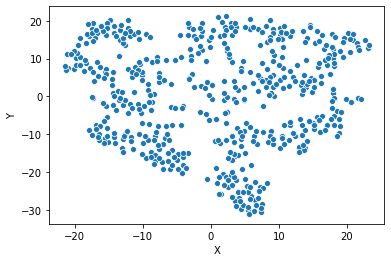

In [11]:
#plot with seaborn
sns.scatterplot(x="X", y="Y",
              data=tsne_df);

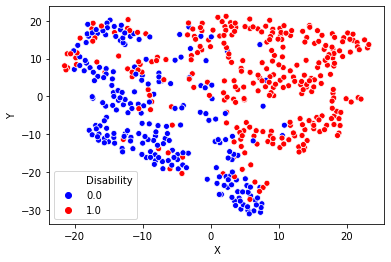

In [12]:
#plot with seaborn
sns.scatterplot(x="X", y="Y",
              hue="Disability",
              palette=['blue','red'],
              legend='full',
              data=tsne_df);

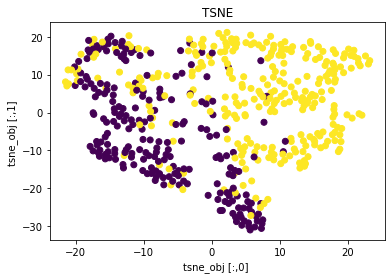

In [13]:
#matplotlib
fig, ax = plt.subplots()
ax.scatter(tsne_obj [:,0], tsne_obj[:,1], c=y)
ax.set_xlabel('tsne_obj [:,0] ')
ax.set_ylabel('tsne_obj [:,1] ')
ax.set_title("TSNE")
plt.show()

In [14]:
#merge data frames by columns
df = pd.concat([akmdf,tsne_df],axis=1)
#check data
#df.head()

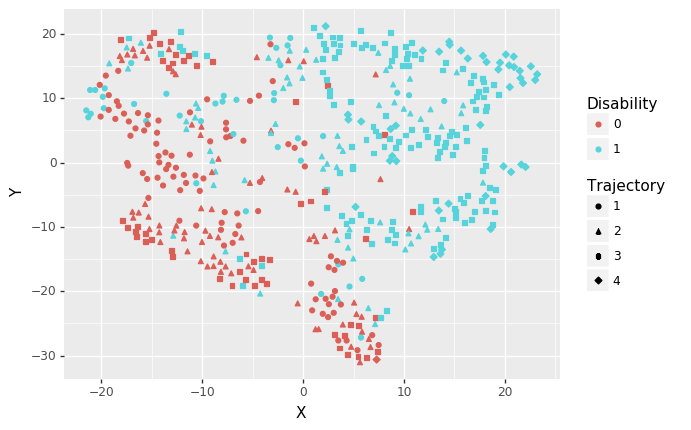

<ggplot: (-9223371925312866984)>

In [15]:
#ggplot style
#note the use of data merged from tsne output
(ggplot (df)
 + geom_point(aes('X ', 'Y',color='factor(Disability)',shape='factor(Akmed)'))
)+labs(color="Disability",shape='Trajectory')
